# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **12th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

4

: 

['Myanmar', 'Georgia', 'Hungary', 'Fiji', 'Tanzania']

,
 

5

: 

[

'Jordan'

, 

'Belize'

, 

'Dominica'

, 

'Papua New Guinea'

, 

'Uganda'

, 

'Libya'

,
     

'Grenada'

, 

'Brunei'

, 

'Tunisia'

, 

'Seychelles'

]

,
 

6

: 

[

'Trinidad and Tobago'

, 

'Jamaica'

, 

'Slovakia'

, 

'Namibia'

,
     

'Equatorial Guinea'

, 

'Ireland'

, 

'Mauritius'

, 

'Yemen'

, 

'Czech Republic'

,
     

'Lebanon'

, 

'Andorra'

, 

'Antigua and Barbuda'

, 

'Central African Republic'

,
     

'Guyana'

, 

'Cambodia'

, 

'Kyrgyzstan'

]

,
 

7

: 

[

'Nepal'

, 

'Vietnam'

, 

'Montenegro'

, 

'Palestine'

, 

'Gambia'

, 

'Malawi'

,
     

'Eritrea'

, 

'Botswana'

, 

'Zambia'

, 

'Spain'

, 

'Slovenia'

, 

'Croatia'

,
     

'Saint Vincent and the Grenadines'

, 

'Afghanistan'

, 

'Mozambique'

,
     

'Sao Tome and Principe'

, 

'Cyprus'

, 

'Kazakhstan'

, 

'Norway'

, 

'South Sudan'

,
     

'New Zealand'

, 

'Iceland'

, 

'Guinea-Bissau'

, 

'Paraguay'

, 

'Rwanda'

,
     

'Colombia'

, 

'Netherlands'

, 

'San Marino'

, 

'Israel'

, 

'Monaco'

, 

'Bahamas'

]

,
 

8

: 

[

'Saint Lucia'

, 

'Maldives'

, 

'Cameroon'

, 

'Barbados'

, 

'Morocco'

, 

'Syria'

,
     

'Kosovo'

, 

'Costa Rica'

, 

'Nicaragua'

, 

'Niger'

, 

'Comoros'

, 

'Kenya'

,
     

'Denmark'

, 

'Suriname'

, 

'Angola'

, 

'Thailand'

, 

'Bhutan'

, 

'Australia'

,
     

'Madagascar'

, 

'Malta'

, 

'Burundi'

, 

'Ethiopia'

, 

'Luxembourg'

, 

'Zimbabwe'

,
     

'Chad'

, 

'Liechtenstein'

, 

'Lesotho'

, 

'Djibouti'

, 

'Mongolia'

]

,
 

9

: 

[

'Oman'

, 

'Qatar'

, 

'Ecuador'

, 

'Taiwan'

, 

'Austria'

, 

'South Africa'

,
     

'Argentina'

, 

'Haiti'

, 

'Japan'

, 

'Congo'

, 

'Mauritania'

, 

'Serbia'

, 

'Greece'

,
     

'China'

, 

'Venezuela'

, 

'Philippines'

, 

'Uruguay'

, 

'Lithuania'

, 

'Tajikistan'

,
     

'Sri Lanka'

, 

'Ukraine'

, 

'India'

, 

'Gabon'

, 

'Sudan'

, 

'Finland'

, 

'Ghana'

,
     

'Sierra Leone'

, 

'Korea, South'

, 

'Benin'

, 

'Guatemala'

]

,
 

10

: 

[

'Chile'

, 

'Guinea'

, 

'Swaziland'

, 

'Somalia'

, 

'Estonia'

, 

'Poland'

, 

'Moldova'

,
      

'Egypt'

, 

'Liberia'

, 

'Senegal'

, 

'Mali'

, 

'Singapore'

, 

'Pakistan'

,
      

'Cape Verde'

, 

'Uzbekistan'

, 

'Iraq'

, 

'Canada'

, 

'Germany'

, 

'El Salvador'

,
      

'Cuba'

, 

'Saudi Arabia'

, 

'Azerbaijan'

, 

'Switzerland'

, 

'Belarus'

, 

'Bermuda'

,
      

'Indonesia'

, 

'Romania'

, 

'Albania'

, 

'Burkina Faso'

]

,
 

11

: 

[

'Algeria'

, 

'Honduras'

, 

'Dominican Republic'

, 

'Bosnia and Herzegovina'

,
      

'Malaysia'

, 

'Bangladesh'

, 

'Portugal'

, 

'Nigeria'

, 

'Belgium'

, 

'Panama'

,
      

'Bulgaria'

, 

'Togo'

, 

'Peru'

, 

'Mexico'

, 

'Kuwait'

, 

'Armenia'

]

,
 

12

: 

[

'United States'

, 

'Macedonia'

, 

'Turkey'

, 

'United Arab Emirates'

, 

'Iran'

,
      

'Bahrain'

, 

'Italy'

, 

'Latvia'

, 

'Bolivia'

, 

'Brazil'

, 

'France'

]

,
 

13

: 

['Russia']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=12)
# The number of countries
len(analyser.countries)

12

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

12

: 

[

'United States'

, 

'Macedonia'

, 

'Turkey'

, 

'United Arab Emirates'

, 

'Iran'

,
      

'Bahrain'

, 

'Italy'

, 

'Latvia'

, 

'Bolivia'

, 

'Brazil'

, 

'France'

]

,
 

13

: 

['Russia']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  06May2020   330457362
        1st    Past  07May2020  16May2020   330457362
        2nd    Past  17May2020  27May2020   330457362
        3rd    Past  28May2020  06Jun2020   330457362
        4th    Past  07Jun2020  15Jun2020   330457362
        5th    Past  16Jun2020  27Jun2020   330457362
        6th    Past  28Jun2020  10Jul2020   330457362
        7th    Past  11Jul2020  24Jul2020   330457362
        8th    Past  25Jul2020  08Aug2020   330457362
        9th    Past  09Aug2020  26Aug2020   330457362
        10th   Past  27Aug2020  11Sep2020   330457362
        11th   Past  12Sep2020  25Sep2020   330457362
        12th   Past  26Sep2020  08Oct2020   330457362

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	FRA,  0th phase (12Feb2020 - 24Mar2020): finished 1053 trials in 1 min  0 sec

	IRN,  4th phase (01Jun2020 - 16Jun2020): finished 1228 trials in 1 min  0 sec

	ITA,  7th phase (28May2020 - 22Jul2020): finished 1200 trials in 1 min  0 sec

	MKD,  0th phase (13Mar2020 - 01Jun2020): finished 1190 trials in 1 min  0 sec

	IRN, 11th phase (24Sep2020 - 08Oct2020): finished  203 trials in 0 min 10 sec

	IRN,  3rd phase (15May2020 - 31May2020): finished  182 trials in 0 min 10 sec

	IRN, 10th phase (08Sep2020 - 23Sep2020): finished  193 trials in 0 min 10 sec

	BOL,  6th phase (01Aug2020 - 10Aug2020): finished  150 trials in 0 min  5 sec

	USA,  8th phase (19Aug2020 - 31Aug2020): finished  577 trials in 0 min 25 sec

	USA,  4th phase (08Jul2020 - 17Jul2020): finished  430 trials in 0 min 15 sec

	BOL,  5th phase (24Jul2020 - 31Jul2020): finished  672 trials in 0 min 25 sec

	TUR, 10th phase (07Sep2020 - 21Sep2020): finished  142 trials in 0 min  5 sec

	BRA,  7th phase (11Aug2020 - 19Aug2020): finished 1206 trials in 1 min  0 sec

	RUS,  4th phase (07Jun2020 - 15Jun2020): finished 1140 trials in 1 min  0 sec

	FRA,  9th phase (08Sep2020 - 16Sep2020): finished  363 trials in 0 min 15 sec

	RUS,  6th phase (28Jun2020 - 10Jul2020): finished 1113 trials in 1 min  0 sec

	IRN,  2nd phase (18Apr2020 - 14May2020): finished  378 trials in 0 min 15 sec

	ITA,  2nd phase (29Mar2020 - 08Apr2020): finished 1112 trials in 1 min  0 sec

	MKD,  7th phase (14Aug2020 - 22Aug2020): finished 1165 trials in 1 min  0 sec

	MKD, 11th phase (30Sep2020 - 08Oct2020): finished 1024 trials in 0 min 50 sec

	RUS,  1st phase (07May2020 - 16May2020): finished 1174 trials in 1 min  0 sec

	BRA,  9th phase (30Aug2020 - 10Sep2020): finished  133 trials in 0 min  5 sec

	MKD,  8th phase (23Aug2020 - 03Sep2020): finished 1150 trials in 1 min  0 sec

	ARE,  8th phase (21Aug2020 - 09Sep2020): finished 1212 trials in 1 min  0 sec

	RUS,  7th phase (11Jul2020 - 24Jul2020): finished 1221 trials in 1 min  0 sec

	BHR,  0th phase (06Mar2020 - 05May2020): finished 1153 trials in 1 min  0 sec

	ITA, 10th phase (16Sep2020 - 28Sep2020): finished  266 trials in 0 min 10 sec

	BHR,  3rd phase (14Jun2020 - 24Jun2020): finished 1249 trials in 1 min  0 sec

	ITA,  8th phase (23Jul2020 - 28Aug2020): finished 1176 trials in 1 min  0 sec

	TUR, 11th phase (22Sep2020 - 08Oct2020): finished  142 trials in 0 min  5 sec

	FRA,  5th phase (29May2020 - 01Jul2020): finished 1175 trials in 1 min  0 sec

	ARE,  0th phase (12Feb2020 - 28Apr2020): finished 1133 trials in 1 min  0 sec

	BHR, 10th phase (16Sep2020 - 25Sep2020): finished 1206 trials in 1 min  0 sec

	FRA,  2nd phase (05Apr2020 - 20Apr2020): finished 1199 trials in 1 min  0 sec

	BHR,  2nd phase (02Jun2020 - 13Jun2020): finished 1204 trials in 1 min  0 sec

	LVA,  5th phase (16May2020 - 01Jun2020): finished 1379 trials in 1 min  0 sec

	USA,  3rd phase (25Jun2020 - 07Jul2020): finished 1224 trials in 1 min  0 sec

	ITA,  5th phase (01May2020 - 11May2020): finished  434 trials in 0 min 20 sec

	BOL,  9th phase (03Sep2020 - 10Sep2020): finished  597 trials in 0 min 30 sec

	ITA,  4th phase (19Apr2020 - 30Apr2020): finished  434 trials in 0 min 20 sec

	BRA,  2nd phase (15Jun2020 - 26Jun2020): finished  494 trials in 0 min 20 sec

	FRA,  7th phase (04Aug2020 - 23Aug2020): finished  491 trials in 0 min 20 sec

	LVA,  1st phase (08Apr2020 - 18Apr2020): finished 1159 trials in 1 min  0 sec

	RUS, 11th phase (12Sep2020 - 25Sep2020): finished 1129 trials in 1 min  0 sec

	BOL,  8th phase (26Aug2020 - 02Sep2020): finished  286 trials in 0 min 10 sec

	ARE,  5th phase (21Jun2020 - 03Jul2020): finished  264 trials in 0 min 10 sec

	USA, 11th phase (26Sep2020 - 08Oct2020): finished  834 trials in 0 min 35 sec

	LVA, 11th phase (25Sep2020 - 08Oct2020): finished 1485 trials in 1 min  0 sec

	MKD,  9th phase (04Sep2020 - 16Sep2020): finished  149 trials in 0 min  5 sec

	BHR,  8th phase (20Aug2020 - 04Sep2020): finished 1277 trials in 1 min  0 sec

	LVA, 10th phase (09Sep2020 - 24Sep2020): finished 1482 trials in 1 min  0 sec

	BHR,  5th phase (07Jul2020 - 18Jul2020): finished 1252 trials in 1 min  0 sec

	USA,  7th phase (08Aug2020 - 18Aug2020): finished  883 trials in 0 min 40 sec

	TUR,  8th phase (05Aug2020 - 22Aug2020): finished  349 trials in 0 min 15 sec

	FRA,  4th phase (05May2020 - 28May2020): finished 1169 trials in 1 min  0 sec

	IRN,  7th phase (18Jul2020 - 01Aug2020): finished  135 trials in 0 min  5 sec

	FRA,  1st phase (25Mar2020 - 04Apr2020): finished 1193 trials in 1 min  0 sec

	TUR,  9th phase (23Aug2020 - 06Sep2020): finished  285 trials in 0 min 10 sec

	USA,  9th phase (01Sep2020 - 13Sep2020): finished 1224 trials in 1 min  0 sec

	LVA,  3rd phase (30Apr2020 - 07May2020): finished 1378 trials in 1 min  0 sec

	USA,  6th phase (28Jul2020 - 07Aug2020): finished  358 trials in 0 min 15 sec

	BOL,  3rd phase (06Jul2020 - 15Jul2020): finished 1209 trials in 1 min  0 sec

	RUS,  3rd phase (28May2020 - 06Jun2020): finished 1175 trials in 1 min  0 sec

	USA,  2nd phase (04Jun2020 - 24Jun2020): finished 1262 trials in 1 min  0 sec

	MKD,  5th phase (27Jul2020 - 05Aug2020): finished 1207 trials in 0 min 55 sec

	ARE,  7th phase (23Jul2020 - 20Aug2020): finished 1272 trials in 1 min  0 sec

	ITA,  9th phase (29Aug2020 - 15Sep2020): finished  422 trials in 0 min 15 sec

	RUS,  5th phase (16Jun2020 - 27Jun2020): finished 1357 trials in 1 min  0 sec

	BOL, 10th phase (11Sep2020 - 21Sep2020): finished  298 trials in 0 min 10 sec

	TUR,  2nd phase (30Apr2020 - 08May2020): finished 1143 trials in 0 min 50 sec

	ITA,  6th phase (12May2020 - 27May2020): finished  275 trials in 0 min 10 sec

	BOL,  0th phase (01Apr2020 - 13Jun2020): finished 1266 trials in 1 min  0 sec

	IRN,  8th phase (02Aug2020 - 18Aug2020): finished  153 trials in 0 min  5 sec

	BOL,  7th phase (11Aug2020 - 25Aug2020): finished 1318 trials in 1 min  0 sec

	ARE,  6th phase (04Jul2020 - 22Jul2020): finished 1247 trials in 1 min  0 sec

	ARE,  9th phase (10Sep2020 - 21Sep2020): finished 1262 trials in 1 min  0 sec

	ITA, 11th phase (29Sep2020 - 08Oct2020): finished  196 trials in 0 min 10 sec

	LVA,  2nd phase (19Apr2020 - 29Apr2020): finished 1174 trials in 1 min  0 sec

	BRA, 10th phase (11Sep2020 - 23Sep2020): finished  151 trials in 0 min  5 sec

	MKD,  1st phase (02Jun2020 - 24Jun2020): finished 1157 trials in 1 min  0 sec

	IRN,  6th phase (03Jul2020 - 17Jul2020): finished  160 trials in 0 min  5 sec

	RUS,  2nd phase (17May2020 - 27May2020): finished 1192 trials in 1 min  0 sec

	RUS,  0th phase (12Feb2020 - 06May2020): finished 1288 trials in 1 min  0 sec

	TUR,  4th phase (23May2020 - 12Jun2020): finished 1277 trials in 1 min  0 sec

	BRA,  1st phase (28May2020 - 14Jun2020): finished 1291 trials in 1 min  0 sec

	BRA,  4th phase (09Jul2020 - 21Jul2020): finished 1347 trials in 1 min  0 sec

	RUS,  8th phase (25Jul2020 - 08Aug2020): finished 1356 trials in 1 min  0 sec

	LVA,  0th phase (10Mar2020 - 07Apr2020): finished 1570 trials in 1 min  0 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 1418 trials in 1 min  0 sec

	LVA,  7th phase (10Jul2020 - 06Aug2020): finished 1627 trials in 1 min  0 sec

	LVA,  8th phase (07Aug2020 - 28Aug2020): finished 1630 trials in 1 min  0 sec

	TUR,  6th phase (28Jun2020 - 15Jul2020): finished  564 trials in 0 min 20 sec

	IRN,  9th phase (19Aug2020 - 07Sep2020): finished  179 trials in 0 min  5 sec

	TUR,  7th phase (16Jul2020 - 04Aug2020): finished  188 trials in 0 min  5 sec

	BRA,  8th phase (20Aug2020 - 29Aug2020): finished 1409 trials in 1 min  0 sec

	MKD,  6th phase (06Aug2020 - 13Aug2020): finished 1423 trials in 1 min  0 sec

	USA,  5th phase (18Jul2020 - 27Jul2020): finished  448 trials in 0 min 15 sec

	ITA,  3rd phase (09Apr2020 - 18Apr2020): finished  297 trials in 0 min 10 sec

	ARE, 10th phase (22Sep2020 - 29Sep2020): finished 1122 trials in 0 min 45 sec

	FRA,  6th phase (02Jul2020 - 03Aug2020): finished  293 trials in 0 min 10 sec

	BOL,  1st phase (14Jun2020 - 25Jun2020): finished 1424 trials in 1 min  0 sec

	BOL,  4th phase (16Jul2020 - 23Jul2020): finished  321 trials in 0 min 10 sec

	ARE,  3rd phase (25May2020 - 06Jun2020): finished 1411 trials in 1 min  0 sec

	TUR,  5th phase (13Jun2020 - 27Jun2020): finished 1405 trials in 1 min  0 sec

	BRA,  3rd phase (27Jun2020 - 08Jul2020): finished 1355 trials in 1 min  0 sec

	USA, 10th phase (14Sep2020 - 25Sep2020): finished  743 trials in 0 min 30 sec

	BHR,  7th phase (05Aug2020 - 19Aug2020): finished  305 trials in 0 min 10 sec

	ARE,  1st phase (29Apr2020 - 14May2020): finished 1347 trials in 1 min  0 sec

	BHR,  6th phase (19Jul2020 - 04Aug2020): finished  318 trials in 0 min 10 sec

	LVA,  9th phase (29Aug2020 - 08Sep2020): finished 1566 trials in 1 min  0 sec

	BHR,  9th phase (05Sep2020 - 15Sep2020): finished  163 trials in 0 min  5 sec

	MKD,  4th phase (17Jul2020 - 26Jul2020): finished  340 trials in 0 min 10 sec

	IRN,  1st phase (30Mar2020 - 17Apr2020): finished 1541 trials in 1 min  0 sec

	USA,  0th phase (09Feb2020 - 03May2020): finished 1500 trials in 1 min  0 sec

	ITA,  1st phase (21Mar2020 - 28Mar2020): finished 1536 trials in 1 min  0 sec

	FRA,  8th phase (24Aug2020 - 07Sep2020): finished 1007 trials in 0 min 40 sec

	BRA,  6th phase (31Jul2020 - 10Aug2020): finished 1015 trials in 0 min 40 sec

	TUR,  3rd phase (09May2020 - 22May2020): finished 1417 trials in 1 min  0 sec

	BHR,  4th phase (25Jun2020 - 06Jul2020): finished  565 trials in 0 min 20 sec

	MKD, 10th phase (17Sep2020 - 29Sep2020): finished  842 trials in 0 min 35 sec

	IRN,  5th phase (17Jun2020 - 02Jul2020): finished 1290 trials in 1 min  0 sec

	USA,  1st phase (04May2020 - 03Jun2020): finished 1276 trials in 1 min  0 sec

	MKD,  3rd phase (08Jul2020 - 16Jul2020): finished  419 trials in 0 min 15 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 1308 trials in 1 min  0 sec

	LVA,  6th phase (02Jun2020 - 09Jul2020): finished 1329 trials in 1 min  0 sec

	BRA,  0th phase (16Mar2020 - 27May2020): finished 1289 trials in 1 min  0 sec

	ARE,  4th phase (07Jun2020 - 20Jun2020): finished 1333 trials in 1 min  0 sec

	IRN,  0th phase (26Feb2020 - 29Mar2020): finished 1275 trials in 1 min  0 sec

	FRA,  3rd phase (21Apr2020 - 04May2020): finished 1291 trials in 1 min  0 sec

	BOL,  2nd phase (26Jun2020 - 05Jul2020): finished  276 trials in 0 min 10 sec

	ARE,  2nd phase (15May2020 - 24May2020): finished 1272 trials in 1 min  0 sec

	TUR,  1st phase (17Apr2020 - 29Apr2020): finished 1345 trials in 1 min  0 sec

	RUS,  9th phase (09Aug2020 - 26Aug2020): finished 1328 trials in 1 min  0 sec

	LVA,  4th phase (08May2020 - 15May2020): finished 1296 trials in 1 min  0 sec

	BHR,  1st phase (06May2020 - 01Jun2020): finished 1304 trials in 1 min  0 sec

	RUS, 10th phase (27Aug2020 - 11Sep2020): finished 1318 trials in 1 min  0 sec

	BRA,  5th phase (22Jul2020 - 30Jul2020): finished 1386 trials in 1 min  0 sec

Completed optimization. Total: 26 min 43 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country Phase                                                        
Russia  0th    Past  12Feb2020  06May2020   330457362  SIR-F  0.02   
        1st    Past  07May2020  16May2020   330457362  SIR-F  2.51   
        2nd    Past  17May2020  27May2020   330457362  SIR-F  1.15   
        3rd    Past  28May2020  06Jun2020   330457362  SIR-F   1.1   
        4th    Past  07Jun2020  15Jun2020   330457362  SIR-F  1.09   
        5th    Past  16Jun2020  27Jun2020   330457362  SIR-F   0.8   
        6th    Past  28Jun2020  10Jul2020   330457362  SIR-F  0.94   
        7th    Past  11Jul2020  24Jul2020   330457362  SIR-F  0.85   
        8th    Past  25Jul2020  08Aug2020   330457362  SIR-F  0.74   
        9th    Past  09Aug2020  26Aug2020   330457362  SIR-F  0.93   
        10th   Past  27Aug2020  11Sep2020   330457362  SIR-F  0.88   
        11th   Past  12Sep2020  25Sep2020   330457362  SIR-F  1.59   
        12th   Past  26Sep2020  08Oct2020   330457362      -     -   

                     theta        kappa         rho        sigma  tau  \
Country Phase                                                           
Russia  0th       0.602763     0.544883   0.0340813   0.00229851  360   
        1st    0.000729031  0.000119717   0.0129583   0.00504465  360   
        2nd    0.000245149  0.000113228  0.00683065   0.00582833  360   
        3rd      0.0003578  0.000113228  0.00527013   0.00469421  360   
        4th      0.0185887  2.41483e-06  0.00426846   0.00384564  360   
        5th    0.000390937  7.58064e-05  0.00341093   0.00418775  360   
        6th     0.00163628  6.92055e-05  0.00248239    0.0025637  360   
        7th    0.000914318  2.12821e-05  0.00196508   0.00229007  360   
        8th       0.020427  3.65764e-06  0.00161607   0.00213574  360   
        9th      0.0197123   9.9623e-06  0.00138111   0.00145289  360   
        10th   0.000879664  2.12578e-05  0.00125177   0.00139583  360   
        11th     0.0259253  2.41468e-06   0.0013892  0.000845992  360   
        12th             -            -           -            -    -   

              1/alpha2 [day] 1/gamma [day] 1/beta [day] alpha1 [-]      RMSLE  \
Country Phase                                                                   
Russia  0th                0           108            7      0.603    18.9667   
        1st             2088            49           19      0.001  0.0742295   
        2nd             2207            42           36          0   0.108726   
        3rd             2207            53           47          0  0.0735318   
        4th           103526            65           58      0.019  0.0516445   
        5th             3297            59           73          0   0.081878   
        6th             3612            97          100      0.002  0.0617077   
        7th            11746           109          127      0.001   0.071869   
        8th            68350           117          154       0.02   0.060913   
        9th            25094           172          181       0.02  0.0560039   
        10th           11760           179          199      0.001  0.0441862   
        11th          103533           295          179      0.026   0.026544   
        12th               -             -            -          -          -   

              Trials       Runtime  
Country Phase                       
Russia  0th     1288  1 min  0 sec  
        1st     1174  1 min  0 sec  
        2nd     1192  1 min  0 sec  
        3rd     1175  1 min  0 sec  
        4th     1140  1 min  0 sec  
        5th     1357  1 min  0 sec  
        6th     1113  1 min  0 sec  
        7th     1221  1 min  0 sec  
        8th     1356  1 min  0 sec  
        9th     1328  1 min  0 sec  
        10th    1318  1 min  0 sec  
        11th    1129  1 min  0 sec  
        12th       -             -

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-09,United States,0.0181905,0.000449987,0.0101124,0.00146959,0.018,555,24,170,...,0,0,0,0,0,2,0,0,1,5.56
1,2020-02-09,United States,0.0181905,0.000449987,0.0101124,0.00146959,0.018,555,24,170,...,0,0,0,0,0,0,0,0,0,0.00
2,2020-02-09,United States,0.0181905,0.000449987,0.0101124,0.00146959,0.018,555,24,170,...,0,0,0,0,0,0,0,0,0,0.00
3,2020-02-09,United States,0.0181905,0.000449987,0.0101124,0.00146959,0.018,555,24,170,...,0,0,0,0,0,0,0,0,0,0.00
4,2020-02-09,United States,0.0181905,0.000449987,0.0101124,0.00146959,0.018,555,24,170,...,0,0,0,0,0,0,0,0,0,0.00


### $Rt$: Reprodcution number $\mathrm{[-]}$

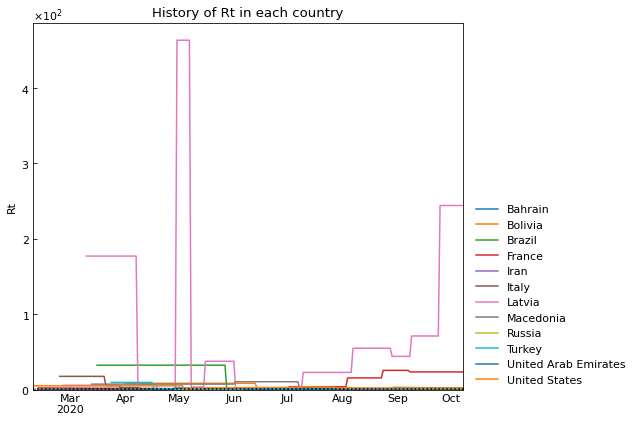

Country,Bahrain,Bolivia,Brazil,France,Iran,Italy,Latvia,Macedonia,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,
2020-10-04,0.99,0.61,1.05,23.57,1.51,2.21,244.21,1.67,1.59,1.12,1.11,2.05
2020-10-05,0.99,0.61,1.05,23.57,1.51,2.21,244.21,1.67,1.59,1.12,1.11,2.05
2020-10-06,0.99,0.61,1.05,23.57,1.51,2.21,244.21,1.67,1.59,1.12,1.11,2.05
2020-10-07,0.99,0.61,1.05,23.57,1.51,2.21,244.21,1.67,1.59,1.12,1.11,2.05
2020-10-08,0.99,0.61,1.05,23.57,1.51,2.21,244.21,1.67,1.59,1.12,1.11,2.05


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

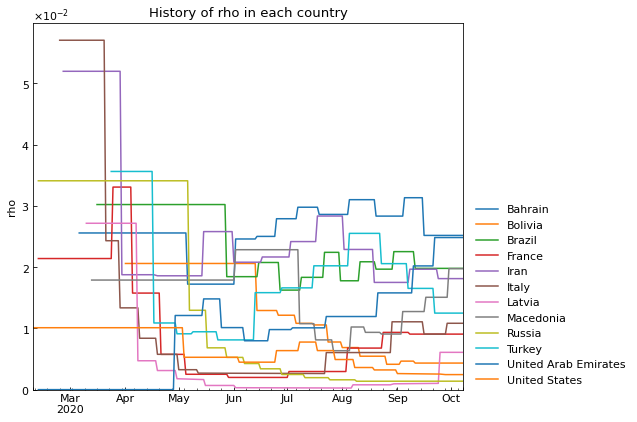

Country,Bahrain,Bolivia,Brazil,France,Iran,Italy,Latvia,Macedonia,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,
2020-10-04,0.025169,0.004344,0.019793,0.009068,0.018123,0.010837,0.006095,0.019749,0.001389,0.012495,0.024824,0.002463
2020-10-05,0.025169,0.004344,0.019793,0.009068,0.018123,0.010837,0.006095,0.019749,0.001389,0.012495,0.024824,0.002463
2020-10-06,0.025169,0.004344,0.019793,0.009068,0.018123,0.010837,0.006095,0.019749,0.001389,0.012495,0.024824,0.002463
2020-10-07,0.025169,0.004344,0.019793,0.009068,0.018123,0.010837,0.006095,0.019749,0.001389,0.012495,0.024824,0.002463
2020-10-08,0.025169,0.004344,0.019793,0.009068,0.018123,0.010837,0.006095,0.019749,0.001389,0.012495,0.024824,0.002463


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

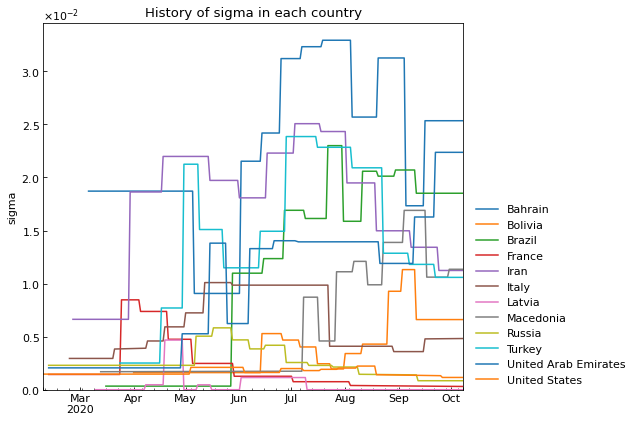

Country,Bahrain,Bolivia,Brazil,France,Iran,Italy,Latvia,Macedonia,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,
2020-10-04,0.025348,0.006609,0.018514,0.000305,0.011237,0.004824,0.0,0.011349,0.000846,0.010586,0.02237,0.001155
2020-10-05,0.025348,0.006609,0.018514,0.000305,0.011237,0.004824,0.0,0.011349,0.000846,0.010586,0.02237,0.001155
2020-10-06,0.025348,0.006609,0.018514,0.000305,0.011237,0.004824,0.0,0.011349,0.000846,0.010586,0.02237,0.001155
2020-10-07,0.025348,0.006609,0.018514,0.000305,0.011237,0.004824,0.0,0.011349,0.000846,0.010586,0.02237,0.001155
2020-10-08,0.025348,0.006609,0.018514,0.000305,0.011237,0.004824,0.0,0.011349,0.000846,0.010586,0.02237,0.001155


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

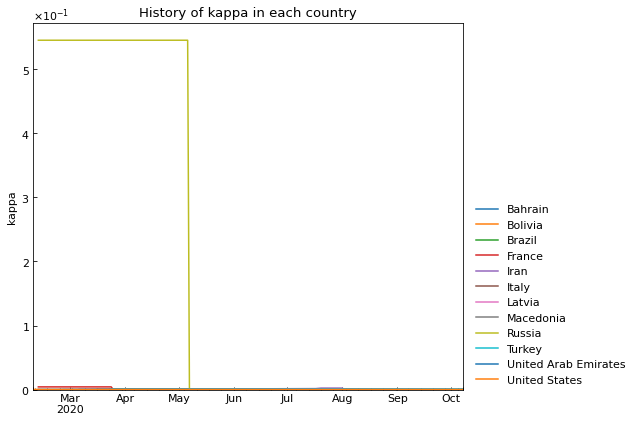

Country,Bahrain,Bolivia,Brazil,France,Iran,Italy,Latvia,Macedonia,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,
2020-10-04,0.000046,0.000059,0.000309,0.000079,0.000191,0.000071,0.000025,0.000455,0.000002,0.000517,0.000001,0.000046
2020-10-05,0.000046,0.000059,0.000309,0.000079,0.000191,0.000071,0.000025,0.000455,0.000002,0.000517,0.000001,0.000046
2020-10-06,0.000046,0.000059,0.000309,0.000079,0.000191,0.000071,0.000025,0.000455,0.000002,0.000517,0.000001,0.000046
2020-10-07,0.000046,0.000059,0.000309,0.000079,0.000191,0.000071,0.000025,0.000455,0.000002,0.000517,0.000001,0.000046
2020-10-08,0.000046,0.000059,0.000309,0.000079,0.000191,0.000071,0.000025,0.000455,0.000002,0.000517,0.000001,0.000046


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

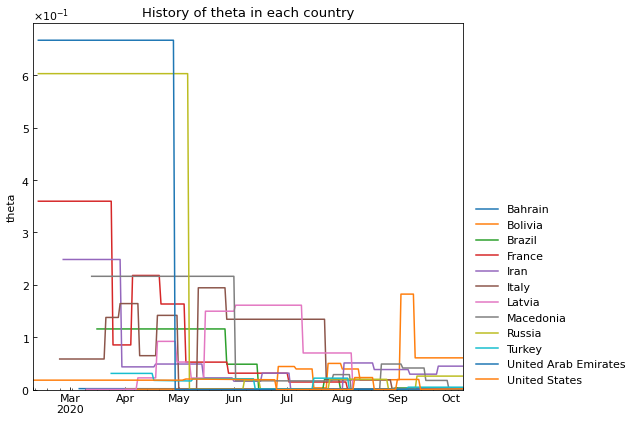

Country,Bahrain,Bolivia,Brazil,France,Iran,Italy,Latvia,Macedonia,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,
2020-10-04,0.001252,0.060726,0.003232,0.000744,0.044911,0.001,0.001247,0.000688,0.025925,0.00479,0.001258,0.001592
2020-10-05,0.001252,0.060726,0.003232,0.000744,0.044911,0.001,0.001247,0.000688,0.025925,0.00479,0.001258,0.001592
2020-10-06,0.001252,0.060726,0.003232,0.000744,0.044911,0.001,0.001247,0.000688,0.025925,0.00479,0.001258,0.001592
2020-10-07,0.001252,0.060726,0.003232,0.000744,0.044911,0.001,0.001247,0.000688,0.025925,0.00479,0.001258,0.001592
2020-10-08,0.001252,0.060726,0.003232,0.000744,0.044911,0.001,0.001247,0.000688,0.025925,0.00479,0.001258,0.001592


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72389 entries, 0 to 72542
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 72389 non-null  datetime64[ns]
 1   Country                              72389 non-null  object        
 2   Rt                                   72389 non-null  float64       
 3   theta                                72389 non-null  float64       
 4   kappa                                72389 non-null  float64       
 5   rho                                  72389 non-null  float64       
 6   sigma                                72389 non-null  float64       
 7   School_closing                       72389 non-null  int64         
 8   Workplace_closing                    72389 non-null  int64         
 9   Cancel_events                        72389 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.176342,-0.134575,0.047972,-0.281398,-0.222554,-0.084383,-0.126133,-0.121734,-0.112851,-0.166326,-0.343957,-0.046866,-0.002654,-0.204429,-0.118634,-0.133428
theta,-0.176342,1.000000,0.929309,0.667042,0.062164,-0.135231,-0.139305,-0.180750,-0.093032,-0.098730,0.212685,0.103612,0.114965,-0.339861,-0.285451,-0.034910,-0.049815
kappa,-0.134575,0.929309,1.000000,0.717549,0.030599,-0.133354,-0.126065,-0.107394,-0.063728,-0.070175,0.262379,0.192657,0.211020,-0.339274,-0.188815,-0.024687,-0.023881
rho,0.047972,0.667042,0.717549,1.000000,0.149954,-0.122455,-0.157517,-0.057786,-0.002726,-0.030435,0.206374,0.204146,0.128285,-0.413999,-0.407005,-0.260489,-0.017269
sigma,-0.281398,0.062164,0.030599,0.149954,1.000000,0.276792,0.065090,0.283069,0.137592,0.191766,0.204132,0.287713,0.102705,0.008590,-0.041632,0.073129,0.245139
School_closing,-0.222554,-0.135231,-0.133354,-0.122455,0.276792,1.000000,0.712937,0.724405,0.614666,0.543361,0.601185,0.521695,0.454280,0.640472,0.415783,0.231824,0.811973
Workplace_closing,-0.084383,-0.139305,-0.126065,-0.157517,0.065090,0.712937,1.000000,0.622500,0.616631,0.512102,0.612111,0.420633,0.439901,0.788899,0.450683,0.378511,0.821864
Cancel_events,-0.126133,-0.180750,-0.107394,-0.057786,0.283069,0.724405,0.622500,1.000000,0.673086,0.578046,0.516214,0.569881,0.681387,0.649814,0.321149,0.277720,0.820598
Gatherings_restrictions,-0.121734,-0.093032,-0.063728,-0.002726,0.137592,0.614666,0.616631,0.673086,1.000000,0.781776,0.647201,0.692482,0.607046,0.559340,0.248205,0.110878,0.862861
Transport_closing,-0.112851,-0.098730,-0.070175,-0.030435,0.191766,0.543361,0.512102,0.578046,0.781776,1.000000,0.578282,0.627185,0.591628,0.337040,0.028766,-0.149325,0.758973


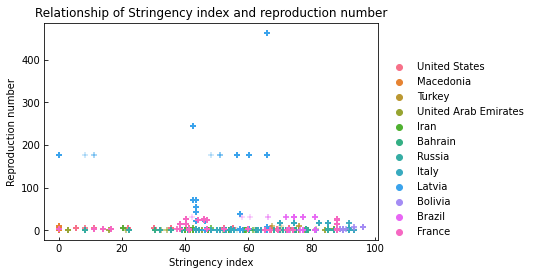

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()